In [385]:
import time
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [386]:
def loadData(fileNameStr):
    df = pd.read_csv(fileNameStr,sep=' ', header=None)
    df.columns = ['cityNumber', 'x', 'y']
    xs = df.y
    ys = df.x
    return xs, ys

In [387]:
xs, ys = loadData('Djibouti_38_coordinates.tsp')
numPoints = len(xs)

In [388]:
#function used to build the distance matrix
def distance(point1, point2):
    return np.sqrt(sum((point1-point2)**2))

def createDistanceMatrix(xs, ys):
    numPoints = len(xs)
    dists = np.ndarray((numPoints,numPoints))
    for i in range(numPoints):
        dists[i,i] = 0
        for j in range(i+1,numPoints):
            dists[i,j] = distance(np.array([xs[i],ys[i]]), np.array([xs[j],ys[j]]))
            dists[j,i] = dists[i,j]   
    return dists

In [389]:
dists = createDistanceMatrix(xs, ys)

In [390]:
def routeLength(path, distancesMatrix):
    curLength = distancesMatrix[0,path[0]]
    for i in range(len(path)-1):
        curLength += distancesMatrix[path[i], path[i+1]]
    curLength += distancesMatrix[path[-1],0]
    return curLength

In [391]:
curPath = np.array([i for i in range(1,numPoints)])
curLength = routeLength(curPath, dists)
print(curPath)
print(curLength)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]
17099.017153650082


In [392]:
def computeBestPath(xs, ys):

    g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
    path = []     #points used in the path
    path_x = []   #x values of points, used to update g
    path_y = []   #y values of points, used to update
    outstanding = [i for i in range(numPoints)] 

    # find 3 closest points to g
    sortedOutstanding = sorted(outstanding, key = lambda i: distance(g,np.array([xs[i],ys[i]])))
    for i in range(3):
        path.append(sortedOutstanding[i])
        path_x.append(xs[sortedOutstanding[i]])
        path_y.append(ys[sortedOutstanding[i]])

    #remove from sortedOutstanding by value
    for i in range(3):
        outstanding.remove(path[i])

    for count in range(0, numPoints-3):
    #for count in range(0, 1):    
        g = np.array([np.mean(path_x),np.mean(path_y)])
        #find closest point to g in list of outstanding points
        minDist = distance(g,np.array([xs[outstanding[0]],ys[outstanding[0]]]))
        minPos = 0
        for i in range(1, len(outstanding)):
            compDist = distance(g,np.array([xs[outstanding[i]],ys[outstanding[i]]]))
            if compDist < minDist:
                minDist = compDist
                minPos = i
        pNewName = outstanding[minPos]
        pNew = np.array([xs[pNewName],ys[pNewName]])

        p = np.array([xs[path[-1]],ys[path[-1]]])
        pNext = np.array([xs[path[0]],ys[path[0]]])
        minDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
        minPos = -1
        for i in range(len(path)-1):
            p = np.array([xs[path[i]],ys[path[i]]])
            pNext = np.array([xs[path[i+1]],ys[path[i+1]]])
            compDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
            if compDist < minDist:
                minDist = compDist
                minPos = i
        path.insert(minPos+1, pNewName)
        path_x.append(xs[pNewName])
        path_y.append(ys[pNewName])
        outstanding.remove(pNewName)

    zeroPos = path.index(0)
    res = path[zeroPos+1:] + path[:zeroPos]
        
    return res

In [393]:
startTime = time.time()
bestPathTest = computeBestPath(xs, ys)
endTime = time.time()
runTime = endTime - startTime
print(runTime)
bestPathLength = routeLength(bestPathTest, dists)

0.08625936508178711


In [394]:
print(bestPathTest)
print(bestPathLength)

[1, 3, 2, 4, 6, 7, 8, 10, 11, 15, 16, 17, 18, 26, 27, 21, 23, 30, 35, 33, 32, 37, 36, 34, 31, 29, 28, 25, 24, 22, 19, 14, 12, 5, 13, 20, 9]
8168.130299691751


In [395]:
def visualiseRoute(xs, ys, path, routeLength):
    fig, ax = plt.subplots(1,1)
    dash = [5, 5]
    #ax.scatter([-5,5],[-5,5], visible=False)
    ax.scatter(xs[0],ys[0], color='black')
    ax.scatter(xs[1:], ys[1:], color='blue')
    ax.plot([xs[0],xs[path[0]]],[ys[0],ys[path[0]]], color='red', dashes=dash)
    for i in range(numPoints-2):
        ax.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]], color='red', dashes=dash)
    ax.plot([xs[0],xs[path[-1]]],[ys[0],ys[path[-1]]], color='red', dashes=dash)    
    ax.set_title('Route length: {:.3}'.format(routeLength))

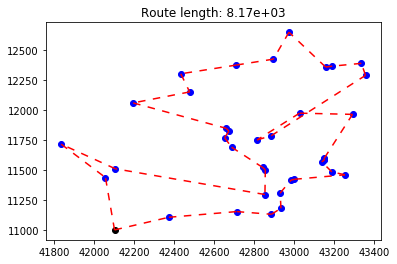

In [396]:
visualiseRoute(xs, ys, bestPathTest, bestPathLength)

In [397]:
def visualiseCurrentRoute(xs, ys, path):
    # for sub path visualisation when 0 does not belong to path
    routeLength = 0
    fig, ax = plt.subplots(1,1)
    dash = [5, 0]
    ax.scatter([-5,5],[-5,5], visible=False)
    ax.scatter(xs, ys, color='blue')
    ax.plot([xs[path[0]],xs[path[-1]]],[ys[path[0]],ys[path[-1]]], color='red', dashes=dash)
    routeLength+=distance(np.array([xs[path[0]],ys[path[0]]]),np.array([xs[path[-1]],ys[path[-1]]]))
    for i in range(len(path)-1):
        ax.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]], color='red', dashes=dash)
        routeLength+=distance(np.array([xs[path[i]],ys[path[i]]]),np.array([xs[path[i+1]],ys[path[i+1]]]))
    ax.set_title('Route length: {:.3}'.format(routeLength))

In [398]:
class pathAnimationDataHolder():
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys
        self.numPoints = len(xs)
        self.g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
        self.path = []     #points used in the path
        self.path_x = []   #x values of points, used to update g
        self.path_y = []   #y values of points, used to update
        self.outstanding = [i for i in range(self.numPoints)] 

        # find 3 closest points to g
        self.sortedOutstanding = sorted(self.outstanding, key = lambda i: distance(self.g,np.array([self.xs[i],self.ys[i]])))
        for i in range(3):
            self.path.append(self.sortedOutstanding[i])
            self.path_x.append(xs[self.sortedOutstanding[i]])
            self.path_y.append(ys[self.sortedOutstanding[i]])

        #remove from sortedOutstanding by value
        for i in range(3):
            self.outstanding.remove(self.path[i])
    

    # animation function.  This is called sequentially
    def addVertex(self):
        self.g = np.array([np.mean(self.path_x),np.mean(self.path_y)])
        #find closest point to g in list of outstanding points
        minDist = distance(self.g,np.array([self.xs[self.outstanding[0]],self.ys[self.outstanding[0]]]))
        minPos = 0
        for i in range(1, len(self.outstanding)):
            compDist = distance(self.g,np.array([self.xs[self.outstanding[i]],self.ys[self.outstanding[i]]]))
            if compDist < minDist:
                minDist = compDist
                minPos = i
        pNewName = self.outstanding[minPos]
        pNew = np.array([self.xs[pNewName],self.ys[pNewName]])

        p = np.array([self.xs[self.path[-1]],self.ys[self.path[-1]]])
        pNext = np.array([self.xs[self.path[0]],self.ys[self.path[0]]])
        minDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
        minPos = -1
        for i in range(len(self.path)-1):
            p = np.array([self.xs[self.path[i]],self.ys[self.path[i]]])
            pNext = np.array([self.xs[self.path[i+1]],self.ys[self.path[i+1]]])
            compDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
            if compDist < minDist:
                minDist = compDist
                minPos = i
        self.path.insert(minPos+1, pNewName)
        self.path_x.append(xs[pNewName])
        self.path_y.append(ys[pNewName])
        self.outstanding.remove(pNewName)


In [399]:
from matplotlib import animation, rc
from IPython.display import HTML

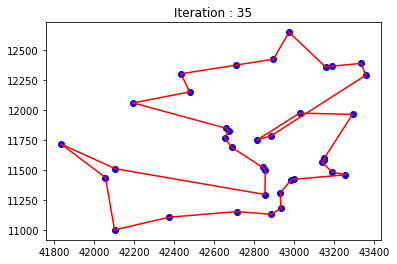

In [400]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
scat = ax.scatter([], [])

# initialization function: plot the background of each frame
def init():
    scat = ax.scatter([],[])
    return scat,

# animation function.  This is called sequentially
def animate(i, dataHolder):
    plt.cla()
    plt.title('Iteration : {}'.format(i))
    
    scat = ax.scatter(dataHolder.xs,dataHolder.ys, color='blue')
    ax.plot([dataHolder.xs[dataHolder.path[0]],dataHolder.xs[dataHolder.path[-1]]],[dataHolder.ys[dataHolder.path[0]],dataHolder.ys[dataHolder.path[-1]]], color='red')
    for i in range(len(dataHolder.path)-1):
        ax.plot([dataHolder.xs[dataHolder.path[i]],dataHolder.xs[dataHolder.path[i+1]]],[dataHolder.ys[dataHolder.path[i]],dataHolder.ys[dataHolder.path[i+1]]], color='red')
    if i>0 and i<dataHolder.numPoints-2:
        dataHolder.addVertex()
    return scat,

dataHold = pathAnimationDataHolder(xs,ys)
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, fargs=(dataHold,), init_func=init, frames=len(xs)-2, interval=200, blit=True)
rc('animation', html='html5')
anim

GA

In [401]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm
from jmetal.operator import BinaryTournamentSelection
from jmetal.operator.crossover import PMXCrossover
from jmetal.operator.mutation import PermutationSwapMutation
from jmetal.problem.singleobjective.tsp import TSP
from jmetal.util.comparator import MultiComparator
from jmetal.util.density_estimator import CrowdingDistance
from jmetal.util.ranking import FastNonDominatedRanking
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.core.solution import PermutationSolution
from jmetal.util.evaluator import SequentialEvaluator
import jmetal.core.algorithm

In [402]:
class myTSP(TSP):
    def __init__(self, distMatrix, numPoints ):
        super(TSP, self).__init__()

        self.distance_matrix = distMatrix
        self.obj_directions = [self.MINIMIZE]
        self.number_of_variables = numPoints
        self.number_of_objectives = 1
        self.number_of_constraints = 0

In [403]:
def reformatGASolution(gaSol):
    zeroPos = gaSol.index(0)
    formatgaSol=[]
    for i in range(zeroPos+1,numPoints):
        formatgaSol.append(gaSol[i])
    for i in range(0,zeroPos):
        formatgaSol.append(gaSol[i])
    return formatgaSol

In [404]:
problem = myTSP(dists, numPoints)

maxGen = 100
popSize = 100
offSpringSize = 100

algorithm = GeneticAlgorithm(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    #mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    mutation=PermutationSwapMutation(0.3),
    crossover=PMXCrossover(0.8),
    selection=BinaryTournamentSelection(
    MultiComparator([FastNonDominatedRanking.get_comparator(),
                                 CrowdingDistance.get_comparator()])),
    termination_criterion=StoppingByEvaluations(max=maxGen*(popSize+offSpringSize)),
    #population_evaluator = SequentialEvaluator()
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('GA Solution')
print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))

print('\nBest Solution')
print('best Path: {}'.format(bestPathTest))
print('best Path: {}'.format(bestPathLength))

print('global optimum: 6656')


GA Solution
Solution: [3, 10, 11, 16, 17, 15, 4, 2, 6, 7, 8, 21, 25, 22, 19, 13, 9, 20, 28, 29, 34, 36, 37, 31, 24, 14, 12, 23, 27, 30, 35, 33, 32, 26, 18, 5, 1]
Fitness: 10438.23663195971
Computing time: 4.7682507038116455

Best Solution
best Path: [1, 3, 2, 4, 6, 7, 8, 10, 11, 15, 16, 17, 18, 26, 27, 21, 23, 30, 35, 33, 32, 37, 36, 34, 31, 29, 28, 25, 24, 22, 19, 14, 12, 5, 13, 20, 9]
best Path: 8168.130299691751
global optimum: 6656


In [405]:
from jmetal.config import store
from jmetal.core.problem import Problem
from jmetal.core.operator import Mutation, Crossover, Selection
from jmetal.util.termination_criterion import TerminationCriterion
from jmetal.util.evaluator import Evaluator
from jmetal.util.generator import Generator
from typing import TypeVar, List
from jmetal.operator.crossover import CXCrossover
from jmetal.operator import BestSolutionSelection
S = TypeVar('S')

In [406]:
class GeneticAlgorithmExt(GeneticAlgorithm):
    def __init__(self,
                 problem: Problem,
                 population_size: int,
                 offspring_population_size: int,
                 mutation: Mutation,
                 crossover: Crossover,
                 selection: Selection,
                 termination_criterion: TerminationCriterion = store.default_termination_criteria,
                 population_generator: Generator = store.default_generator,
                 population_evaluator: Evaluator = store.default_evaluator):
        super(GeneticAlgorithmExt, self).__init__(problem, population_size, offspring_population_size, mutation, crossover, selection, termination_criterion, population_generator, population_evaluator)
        self.averageFitHisto = []
        self.bestFitHisto = []
        self.intCount = 0
    def update_progress(self):
        self.evaluations += self.offspring_population_size

        observable_data = self.get_observable_data()
        self.observable.notify_all(**observable_data)
        
        self.intCount+=1
        fits  = np.array([sol.objectives[0] for sol in self.solutions])
        self.averageFitHisto.append(np.mean(fits))
        self.bestFitHisto.append(np.min(fits))
        



GA Solution
Fitness: 8865.784214568714
Computing time: 26.229568481445312

Best Solution
best Path: 8168.130299691751
global optimum: 6656
best fit 8865.784214568714
average fit 8865.784214568715


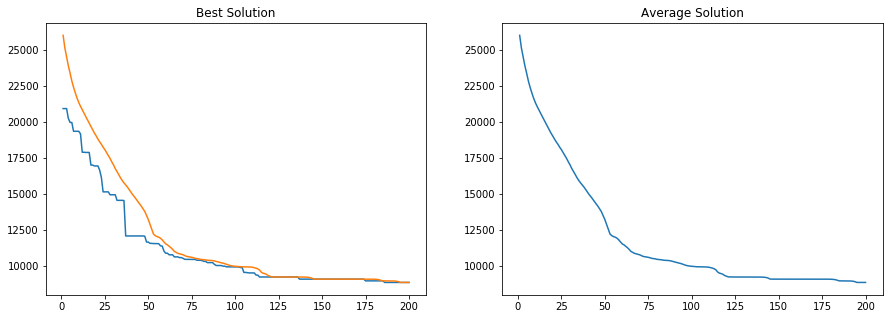

In [409]:
problem = myTSP(dists, numPoints)

maxGen = 200
popSize = 600
offSpringSize = 600

algorithm = GeneticAlgorithmExt(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    #mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    mutation=PermutationSwapMutation(5 / problem.number_of_variables),
    crossover=PMXCrossover(0.7),
    selection=BinaryTournamentSelection(MultiComparator([FastNonDominatedRanking.get_comparator(), CrowdingDistance.get_comparator()])),
    #selection = BestSolutionSelection(), 
    termination_criterion=StoppingByEvaluations(max=popSize + maxGen*offSpringSize)
    #population_evaluator = SequentialEvaluator()
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('\n\nGA Solution')
#print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))

print('\nBest Solution')
#print('best Path: {}'.format(bestPathTest))
print('best Path: {}'.format(bestPathLength))

print('global optimum: 6656')

print('best fit {}'.format(algorithm.bestFitHisto[-1]))
print('average fit {}'.format(algorithm.averageFitHisto[-1]))

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot([i for i in range(1, maxGen+1)], algorithm.bestFitHisto)
ax[0].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[0].title.set_text('Best Solution')
ax[1].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[1].title.set_text('Average Solution')

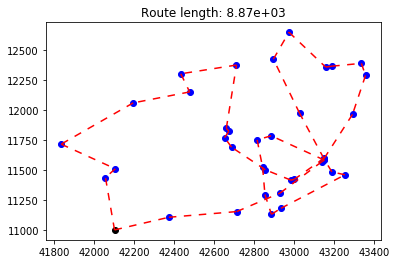

In [410]:
visualiseRoute(xs, ys, gaSol, result.objectives[0])

In [411]:
import random

In [412]:
class GeneticAlgorithmExt2(GeneticAlgorithm):
    def __init__(self,
                 problem: Problem,
                 population_size: int,
                 offspring_population_size: int,
                 guessBest: None,
                 mutation: Mutation,
                 crossover: Crossover,
                 selection: Selection,
                 termination_criterion: TerminationCriterion = store.default_termination_criteria,
                 population_generator: Generator = store.default_generator,
                 population_evaluator: Evaluator = store.default_evaluator):
        super(GeneticAlgorithmExt2, self).__init__(problem, population_size, offspring_population_size, mutation, crossover, selection, termination_criterion, population_generator, population_evaluator)
        self.averageFitHisto = []
        self.bestFitHisto = []
        self.intCount = 0
        self.initBest = guessBest
    def update_progress(self):
        self.evaluations += self.offspring_population_size

        observable_data = self.get_observable_data()
        self.observable.notify_all(**observable_data)
        
        self.intCount+=1
        fits  = np.array([sol.objectives[0] for sol in self.solutions])
        self.averageFitHisto.append(np.mean(fits))
        self.bestFitHisto.append(np.min(fits))
    def create_initial_solutions(self) -> List[S]:
        numVar = self.problem.number_of_variables
        numObj = self.problem.number_of_objectives
        
        new_solution = PermutationSolution(number_of_variables=numVar,
                                           number_of_objectives=numObj)
        new_solution.variables = self.initBest
        
        res = [self.population_generator.new(self.problem)
                for _ in range(1,self.population_size)]
        res = res+ [new_solution]
        return res




GA Solution
Fitness: 7717.504890188314
Computing time: 28.262608528137207
average fit 7717.504890188314

Best Solution
best Path: 8168.130299691751

global optimum: 6656



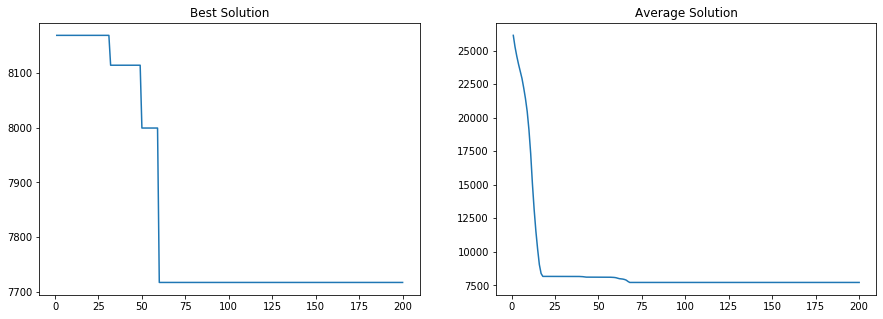

In [413]:
problem = myTSP(dists, numPoints)

maxGen = 200
popSize = 600
offSpringSize = 600

algorithm = GeneticAlgorithmExt2(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    guessBest = bestPathTest + [0],
    #mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    mutation=PermutationSwapMutation(5.0 / problem.number_of_variables),
    crossover=PMXCrossover(0.7),
    selection=BinaryTournamentSelection(MultiComparator([FastNonDominatedRanking.get_comparator(), CrowdingDistance.get_comparator()])),
    #selection = BestSolutionSelection(), 
    termination_criterion=StoppingByEvaluations(max=popSize + maxGen*offSpringSize)
    #population_evaluator = SequentialEvaluator()
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('\n\nGA Solution')
#print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))
print('average fit {}'.format(algorithm.averageFitHisto[-1]))

print('\nBest Solution')
#print('best Path: {}'.format(bestPathTest))
print('best Path: {}\n'.format(bestPathLength))

print('global optimum: 6656\n')

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot([i for i in range(1, maxGen+1)], algorithm.bestFitHisto)
#ax[0].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[0].title.set_text('Best Solution')
ax[1].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[1].title.set_text('Average Solution')

Alternative GA

In [414]:
from sklearn.cluster import KMeans

In [415]:
numClusters = 6
kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(np.column_stack((xs,ys)))
xList = []
yList = []
nameList = []
for i in range(numClusters):
    xList.append([])
    yList.append([])
    nameList.append([])
    
for i in range(numPoints):
    groupNum = kmeans.labels_[i]
    xList[groupNum].append(xs[i])
    yList[groupNum].append(ys[i]) 
    nameList[groupNum].append(i)

print('smallest group: {}'.format(min([len(xi) for xi in xList])))
print('biggest group: {}'.format(max([len(xi) for xi in xList])))


smallest group: 3
biggest group: 9


In [416]:
def visualiseGroups(xList, yList):
    fig, ax = plt.subplots(1,1)
    for i in range(len(xList)):
        ax.scatter(xList[i], yList[i])

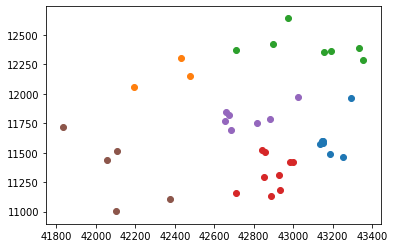

In [417]:
visualiseGroups(xList,yList)

In [418]:
def TSP_exhaustiveSolve(dists):
    # the starting point is assumed to be p_O.
    # a path is then just a permutation of points 1,2,...,n
    # If we had considered permutations of 0,1,2,...n we would consider the same path several times
    # as 0,1,2,...,n is equivalent to 3,4,...,n,0,1,2
    # so starting from 0 reduces the number of permutations we need to consider
    
    # Further optimisation is possible since paths 0,1,2,...,n and 0,n,n-1,...,2,1 are equivalent
    
    # if we had allowed any point to be the starting point
    timeStart = time.time()
    numPoints = dists.shape[0]
    bestPath = [i for i in range(1, numPoints)]
    bestPathLength = routeLength(bestPath, dists)
    permIter = itertools.permutations(bestPath)
    allPaths = []
    keepLoop = True
    while keepLoop:
        try:
            checkPath = next(permIter)
            checkPathLength = routeLength(checkPath, dists)
            allPaths.append(checkPathLength)
            if checkPathLength < bestPathLength:
                bestPathLength = checkPathLength
                bestPath = [el for el in checkPath]
        except StopIteration:
            keepLoop = False
    timeEnd = time.time()
    timeLength = timeEnd-timeStart
    
    return bestPath, bestPathLength, timeLength

In [419]:
#exhaustive search TSP for each subgroup. Could be parallelised

distMatrices = []
optimalSubPaths = []
optimalSubLengths = []
for i in range(numClusters):
    distMat = createDistanceMatrix(xList[i], yList[i])
    optimalSubPath, optimalSubLength, runDuration = TSP_exhaustiveSolve(distMat)
    optimalSubPaths.append(optimalSubPath)
    optimalSubLengths.append(optimalSubLength)

In [420]:
def visualiseSubPaths(xList, yList, optimalSubPaths):
    fig, ax = plt.subplots(1,1)
    
    #ax.scatter([-5,5],[-5,5], visible=False)
    for i in range(len(xList)):
        xs = xList[i]
        ys = yList[i]
        numPoints = len(xs)
        path = optimalSubPaths[i]
        ax.scatter(xs, ys, color='blue')
        ax.plot([xs[0],xs[path[0]]],[ys[0],ys[path[0]]], color='red')
        for i in range(numPoints-2):
            ax.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]], color='red')
        ax.plot([xs[0],xs[path[-1]]],[ys[0],ys[path[-1]]], color='red')
    

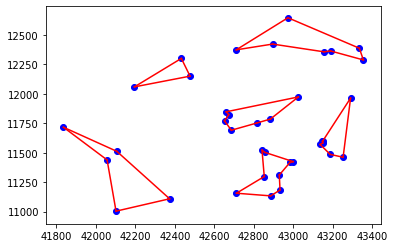

In [421]:
visualiseSubPaths(xList, yList, optimalSubPaths)

In [422]:
class myTSP2(TSP):
    def __init__(self, distMatrix, numPoints, nameList):
        super(TSP, self).__init__()

        self.distance_matrix = distMatrix
        self.name_list = nameList

        self.obj_directions = [self.MINIMIZE]
        self.number_of_variables = numPoints
        self.number_of_objectives = 1
        self.number_of_constraints = 0
    
    def create_solution(self) -> PermutationSolution:
        # The idea is to reuse subsequences obtained from piecewise optimisation performed 
        # on subgroups obtained via kmeans, so that the initial population has 
        # some preoptimised sequences and convergence might be quicker.
        # global recombination from optimised sequences done at random
        # can be improved
        
        new_solution = PermutationSolution(number_of_variables=self.number_of_variables,
                                           number_of_objectives=self.number_of_objectives)
        #new_solution.variables = random.sample(range(self.number_of_variables), k=self.number_of_variables)
        
        randShuf = np.arange(len(self.name_list))
        np.random.shuffle(randShuf)
        
        #sampleSol = [pt for pt in nameList[el] for el in randShuf]
        sampleSol = []
        for el in randShuf:
            seq = nameList[el]
            for pt in seq:
                sampleSol.append(pt)
        new_solution.variables = sampleSol
        
        return new_solution

GA Solution
Solution: [9, 13, 20, 28, 29, 31, 34, 36, 37, 30, 35, 32, 33, 21, 19, 22, 23, 24, 25, 27, 26, 18, 15, 16, 17, 11, 10, 3, 2, 4, 5, 6, 7, 8, 12, 14, 1]
Best Path: 8403.145037025048
Computing time: 2.757875680923462


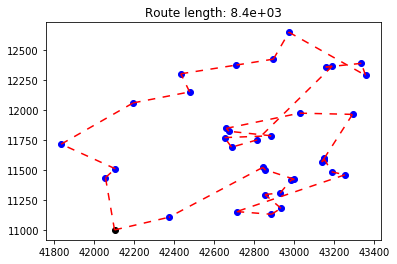

In [425]:
problem = myTSP2(dists, numPoints, nameList)

maxGen = 60
popSize = 200
offSpringSize = 200

algorithm = GeneticAlgorithm(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    mutation=PermutationSwapMutation(5.0 / problem.number_of_variables),
    crossover=PMXCrossover(0.7),
    selection=BinaryTournamentSelection(
    MultiComparator([FastNonDominatedRanking.get_comparator(),
                                 CrowdingDistance.get_comparator()])),
    termination_criterion=StoppingByEvaluations(max=popSize+maxGen*offSpringSize)
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
IGA_bestPath = result.objectives[0]
print('GA Solution')
print('Solution: {}'.format(gaSol))
print('Best Path: {}'.format(IGA_bestPath))
print('Computing time: {}'.format(algorithm.total_computing_time))

visualiseRoute(xs, ys, gaSol, result.objectives[0])



GA Solution
Fitness: 7717.504890188314
Computing time: 56.20008444786072
average fit 7717.504890188314

Best Solution
best Path: 8168.130299691751

global optimum: 6656



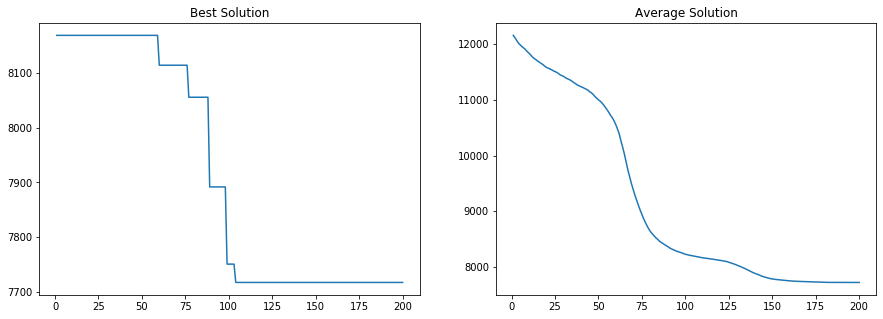

In [434]:
problem = myTSP2(dists, numPoints, nameList)

maxGen = 200
popSize = 1000
offSpringSize = 1000

algorithm = GeneticAlgorithmExt2(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    guessBest = bestPathTest + [0],
    #mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    mutation=PermutationSwapMutation(36 / problem.number_of_variables),
    crossover=PMXCrossover(0.95),
    selection=BinaryTournamentSelection(MultiComparator([FastNonDominatedRanking.get_comparator(), CrowdingDistance.get_comparator()])),
    #selection = BestSolutionSelection(), 
    termination_criterion=StoppingByEvaluations(max=popSize + maxGen*offSpringSize)
    #population_evaluator = SequentialEvaluator()
    )


#***********************
algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('\n\nGA Solution')
#print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))
print('average fit {}'.format(algorithm.averageFitHisto[-1]))

print('\nBest Solution')
#print('best Path: {}'.format(bestPathTest))
print('best Path: {}\n'.format(bestPathLength))

print('global optimum: 6656\n')

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot([i for i in range(1, maxGen+1)], algorithm.bestFitHisto)
#ax[0].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[0].title.set_text('Best Solution')
ax[1].plot([i for i in range(1, maxGen+1)], algorithm.averageFitHisto)
ax[1].title.set_text('Average Solution')
#*********************




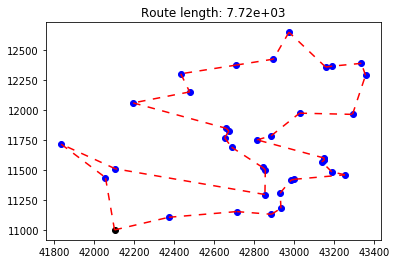

In [432]:
visualiseRoute(xs, ys, gaSol, result.objectives[0])